# Data Exploration

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Reviews.csv")

# Display first 5 rows
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
# Displaying the last 5 rows
print(df.tail())

            Id   ProductId          UserId              ProfileName  \
568449  568450  B001EO7N10  A28KG5XORO54AY         Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z            pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH  Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                 srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
568449                 Will not do without   
568450                        

In [7]:
# Displays the title of cokumns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
# checking data types of various columns
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [9]:
# Cheking if there are null values in our dataset
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Data Visualization

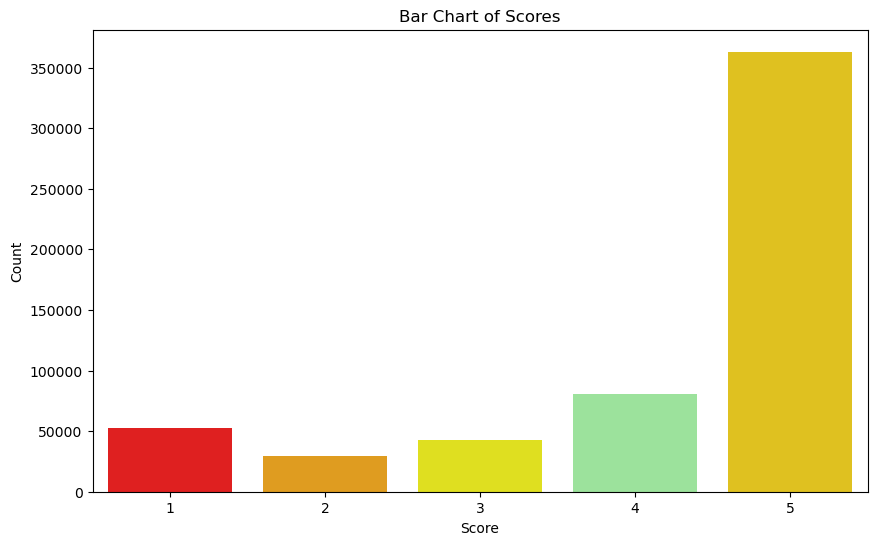

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure scores are sorted correctly and handle missing values
score_counts = df['Score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Custom palette with a more yellowish color for the score 5
custom_palette = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'gold'}

# Bar charts for individual scores
plt.figure(figsize=(10,6))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=custom_palette, dodge=False)
plt.title("Bar Chart of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()

1. **Score Distribution**:
   - **Score 1**: Approximately 50,000 instances (red bar)
   - **Score 2**: Approximately 25,000 instances (orange bar)
   - **Score 3**: Approximately 50,000 instances (yellow bar)
   - **Score 4**: Approximately 100,000 instances (green bar)
   - **Score 5**: Approximately 375,000 instances (gold bar)

2. **Skewed Data**: The chart indicates a significant skew towards the highest score (5), suggesting a large number of positive scores in the sample.

3. **Data Imbalance**: The imbalance in the score distribution highlights the need for sampling techniques to balance the data for more accurate analysis.

To address this imbalance, you can consider using techniques such as undersampling, oversampling, or synthetic data generation (e.g., SMOTE) to create a more balanced dataset.

In [11]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Extract features and target
X = df.drop(columns=['Score'])  # Assuming other features exist
y = df['Score']

# Apply undersampling
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Create a new DataFrame with balanced data
df_balanced = pd.DataFrame(X_resampled)
df_balanced['Score'] = y_resampled

# Check the size of the balanced DataFrame
print(df_balanced.shape)

(148845, 10)


In [12]:
df_balanced.size

1488450

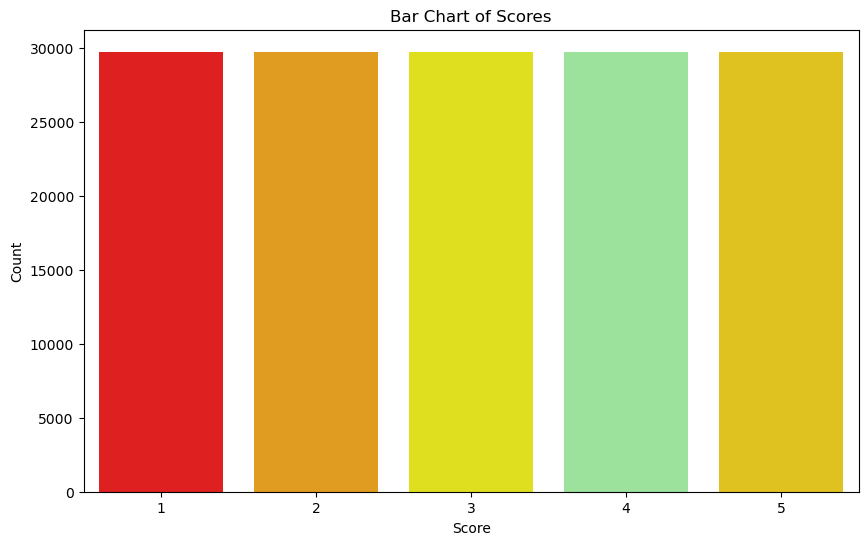

In [13]:
# Ensure scores are sorted correctly and handle missing values
score_counts = df_balanced['Score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Custom palette with a more yellowish color for the score 5
custom_palette = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'gold'}

# Bar charts for individual scores
plt.figure(figsize=(10,6))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=custom_palette, dodge=False)
plt.title("Bar Chart of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()

Sentiment
Negative    59538
Positive    59538
Neutral     29769
Name: count, dtype: int64


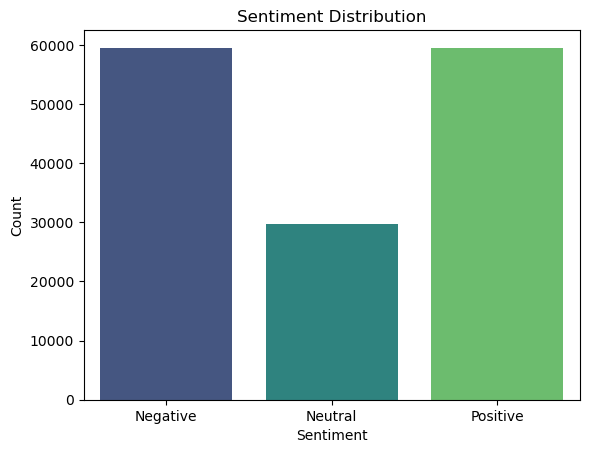

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Score into Sentiment
def get_sentiment(score):
    if score > 3:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df_balanced['Sentiment'] = df_balanced['Score'].apply(get_sentiment)

# Display sentiment counts
print(df_balanced['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x=df_balanced['Sentiment'], hue=df_balanced['Sentiment'], palette='viridis', dodge=False, legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()